In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('/content/matchesSK.csv')
delivery = pd.read_csv('/content/deliveriesSK.csv')

In [ ]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.shape

(756, 18)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
949,471,1,70.0
951,472,1,132.0
953,473,1,125.0
955,474,1,145.0


from matplotlib import pyplot as plt
total_score_df['match_id'].plot(kind='hist', bins=20, title='match_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_score_df['total_runs'].plot(kind='hist', bins=20, title='total_runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
total_score_df.plot(kind='scatter', x='match_id', y='total_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_id']
  ys = series['total_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('total_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['match_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'match_id'}, axis=1)
              .sort_values('match_id', ascending=True))
  xs = counted['match_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('match_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['inning']
  ys = series['total_runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('inning', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('inning')
_ = plt.ylabel('total_runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['inning']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'inning'}, axis=1)
              .sort_values('inning', ascending=True))
  xs = counted['inning']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = total_score_df.sort_values('inning', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('inning')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
total_score_df['match_id'].plot(kind='line', figsize=(8, 4), title='match_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
total_score_df['total_runs'].plot(kind='line', figsize=(8, 4), title='total_runs')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,471,IPL-2014,Abu Dhabi,26-04-2014,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin,NaN,471,70.0
471,472,IPL-2014,Abu Dhabi,26-04-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,23,0,Sandeep Sharma,Sheikh Zayed Stadium,HDPK Dharmasena,RK Illingworth,NaN,472,132.0
472,473,IPL-2014,Sharjah,27-04-2014,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Delhi Daredevils,0,6,M Vijay,Sharjah Cricket Stadium,Aleem Dar,VA Kulkarni,NaN,473,125.0
473,474,IPL-2014,Sharjah,27-04-2014,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,DR Smith,Sharjah Cricket Stadium,AK Chaudhary,VA Kulkarni,NaN,474,145.0


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(388, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,119.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,118.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,117.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,116.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90812,475,NaN,Kings XI Punjab,124.0,2,Kings XI Punjab,Royal Challengers Bangalore,16.0,3.0,GJ Bailey,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,27.0
90813,475,NaN,Kings XI Punjab,124.0,2,Kings XI Punjab,Royal Challengers Bangalore,16.0,4.0,GJ Bailey,...,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,26.0
90814,475,NaN,Kings XI Punjab,124.0,2,Kings XI Punjab,Royal Challengers Bangalore,16.0,5.0,R Dhawan,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,25.0
90815,475,NaN,Kings XI Punjab,124.0,2,Kings XI Punjab,Royal Challengers Bangalore,16.0,6.0,R Dhawan,...,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,24.0


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left,result,current_score,runs_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,1,NaN,NaN,119.0,0,1.0,206.0,9
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,1,NaN,NaN,118.0,0,1.0,206.0,8
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,1,NaN,NaN,117.0,0,1.0,206.0,7
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,1,NaN,NaN,116.0,0,3.0,204.0,6
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,1,NaN,NaN,115.0,0,7.0,200.0,5


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,0.0,0.0,1.0,0.0,1.0,0,NaN,NaN,119.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,118.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,117.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,0.0,0.0,2.0,0.0,2.0,0,NaN,NaN,116.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,0.0,0.0,4.0,0.0,4.0,0,NaN,NaN,115.0


In [ ]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [ ]:
final_df1 = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
final_df1 = final_df1.sample(final_df1.shape[0])

In [ ]:
final_df1.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
5132,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,52.0,40.0,-72,138.0,6.45,7.8,0


In [ ]:
final_df1.dropna(inplace=True)

In [ ]:
final_df1 = final_df1[final_df1['balls_left'] != 0]

In [ ]:
X = final_df1.iloc[:,:-1]
y = final_df1.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
62327,Rajasthan Royals,Deccan Chargers,Jaipur,73.0,35.0,-80,196.0,8.682353,12.514286
15232,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,55.0,56.0,-55,143.0,8.250000,5.892857
32520,Deccan Chargers,Royal Challengers Bangalore,Centurion,100.0,77.0,-35,170.0,9.767442,7.792208
49222,Mumbai Indians,Royal Challengers Bangalore,Bangalore,24.0,29.0,-83,140.0,7.648352,4.965517
80423,Kings XI Punjab,Chennai Super Kings,Chennai,162.0,95.0,-15,186.0,5.760000,10.231579
...,...,...,...,...,...,...,...,...,...
3757,Kolkata Knight Riders,Delhi Daredevils,Kolkata,58.0,59.0,-51,160.0,10.032787,5.898305
18987,Kolkata Knight Riders,Kings XI Punjab,Kolkata,96.0,55.0,-58,174.0,7.200000,10.472727
61075,Kolkata Knight Riders,Rajasthan Royals,Kolkata,107.0,93.0,-18,131.0,5.333333,6.903226
2390,Kolkata Knight Riders,Delhi Daredevils,Delhi,33.0,30.0,-83,168.0,9.000000,6.600000


from matplotlib import pyplot as plt
X_train['runs_left'].plot(kind='hist', bins=20, title='runs_left')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['balls_left'].plot(kind='hist', bins=20, title='balls_left')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['wickets'].plot(kind='hist', bins=20, title='wickets')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['total_runs_x'].plot(kind='hist', bins=20, title='total_runs_x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='runs_left', y='balls_left', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='balls_left', y='wickets', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='wickets', y='total_runs_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='total_runs_x', y='crr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['runs_left'].plot(kind='line', figsize=(8, 4), title='runs_left')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['balls_left'].plot(kind='line', figsize=(8, 4), title='balls_left')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['wickets'].plot(kind='line', figsize=(8, 4), title='wickets')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['total_runs_x'].plot(kind='line', figsize=(8, 4), title='total_runs_x')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
# Create the pipeline
pipe = Pipeline(steps=[
    ('transformer', trf),  # Assuming 'trf' is your ColumnTransformer from previous code
    ('estimator', LogisticRegression())  # Or any other estimator you want to use
])


In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('estimator', LogisticRegression())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8051782189713225

In [ ]:
pipe.predict_proba(X_test)[10]

array([0.20755346, 0.79244654])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [ ]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4.0,6,78.3,21.7
10467,2,8.0,8,75.3,24.7
10473,3,1.0,6,85.7,14.3
10479,4,7.0,6,85.9,14.1
10485,5,12.0,6,79.4,20.6
10491,6,13.0,6,69.8,30.2
10497,7,9.0,6,67.2,32.8
10505,8,15.0,8,51.7,48.3
10511,9,7.0,6,53.7,46.3
10518,10,17.0,7,33.6,66.4


from matplotlib import pyplot as plt
temp_df['end_of_over'].plot(kind='hist', bins=20, title='end_of_over')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df['runs_after_over'].plot(kind='hist', bins=20, title='runs_after_over')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df['wickets_in_over'].plot(kind='hist', bins=20, title='wickets_in_over')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df['lose'].plot(kind='hist', bins=20, title='lose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df.plot(kind='scatter', x='end_of_over', y='runs_after_over', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df.plot(kind='scatter', x='runs_after_over', y='wickets_in_over', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df.plot(kind='scatter', x='wickets_in_over', y='lose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temp_df.plot(kind='scatter', x='lose', y='win', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['end_of_over']
  ys = series['runs_after_over']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('end_of_over', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('end_of_over')
_ = plt.ylabel('runs_after_over')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['end_of_over']
  ys = series['wickets_in_over']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('end_of_over', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('end_of_over')
_ = plt.ylabel('wickets_in_over')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['end_of_over']
  ys = series['lose']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('end_of_over', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('end_of_over')
_ = plt.ylabel('lose')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['end_of_over']
  ys = series['win']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temp_df.sort_values('end_of_over', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('end_of_over')
_ = plt.ylabel('win')

from matplotlib import pyplot as plt
temp_df['end_of_over'].plot(kind='line', figsize=(8, 4), title='end_of_over')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
temp_df['runs_after_over'].plot(kind='line', figsize=(8, 4), title='runs_after_over')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
temp_df['wickets_in_over'].plot(kind='line', figsize=(8, 4), title='wickets_in_over')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
temp_df['lose'].plot(kind='line', figsize=(8, 4), title='lose')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Target-178.0')

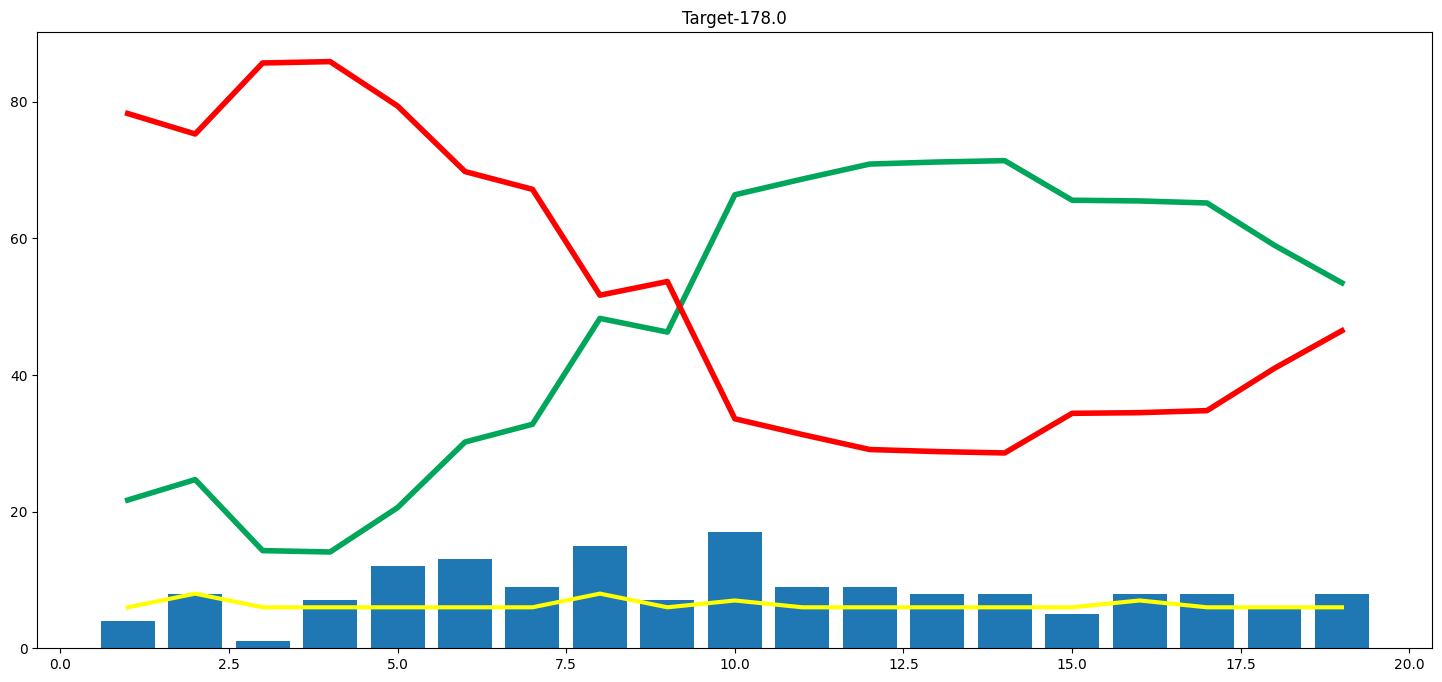

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [ ]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan], dtype=object)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))